In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv').drop(columns=['Блок вопроса'])
questions = df.loc[0]
df = df.drop(0)

In [4]:
df

,Я,Я.1,Я.2,Я.3,Я.4,Я.5,Я.6,Я.7,Я.8,Я.9,...,Потребительское поведение,Потребительское поведение.1,Потребительское поведение.2,Потребительское поведение.3,Потребительское поведение.4,Потребительское поведение.5,Потребительское поведение.6,Потребительское поведение.7,Потребительское поведение.8,Потребительское поведение.9
1,Редко,Часто,Всегда,Редко,Редко,Часто,Часто,Часто,Редко,Редко,...,Никогда,Никогда,Редко,Редко,Часто,Редко,Никогда,Никогда,Никогда,Редко
2,Всегда,Редко,Редко,Редко,Редко,Часто,Всегда,Затрудняюсь ответить,Редко,Редко,...,Часто,Часто,Редко,Часто,Часто,Всегда,Редко,Всегда,Никогда,Часто
3,Редко,Часто,Редко,Часто,Редко,Редко,Часто,Часто,Редко,Никогда,...,Никогда,Редко,Никогда,Никогда,Часто,Редко,Никогда,Никогда,Никогда,Никогда
4,Редко,Затрудняюсь ответить,Часто,Редко,Редко,Редко,Часто,Затрудняюсь ответить,Часто,Часто,...,Редко,Часто,Редко,Часто,Часто,Редко,Редко,Часто,Редко,Редко
5,Часто,Затрудняюсь ответить,Редко,Часто,Затрудняюсь ответить,Часто,Часто,Затрудняюсь ответить,Всегда,Часто,...,Никогда,Редко,Редко,Никогда,Затрудняюсь ответить,Часто,Никогда,Никогда,Никогда,Часто
6,Часто,Часто,Часто,Часто,Часто,Редко,Часто,Часто,Затрудняюсь ответить,Никогда,...,Часто,Редко,Редко,Никогда,Часто,Редко,Никогда,Никогда,Редко,Затрудняюсь ответить
7,Редко,Редко,Затрудняюсь ответить,Редко,Никогда,Никогда,Часто,Редко,Никогда,Никогда,...,Часто,Редко,Затрудняюсь ответить,Редко,Редко,Редко,Никогда,Редко,Часто,Редко
8,Редко,Редко,Редко,Затрудняюсь ответить,Редко,Затрудняюсь ответить,Часто,Никогда,Никогда,Редко,...,Затрудняюсь ответить,Редко,Редко,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,Редко,Часто,Никогда,Редко
9,Часто,Часто,Часто,Редко,Редко,Редко,Часто,Редко,Редко,Редко,...,Редко,Затрудняюсь ответить,Никогда,Редко,Редко,Редко,Редко,Редко,Редко,Часто
10,Редко,Часто,Часто,Редко,Никогда,Редко,Часто,Редко,Редко,Никогда,...,Редко,Редко,Никогда,Редко,Часто,Никогда,Никогда,Никогда,Никогда,Редко


In [5]:
set(df.values.reshape(-1))

{'Всегда', 'Затрудняюсь ответить', 'Никогда', 'Редко', 'Часто'}

In [6]:
ndata = df.replace(['Никогда', 'Редко', 'Затрудняюсь ответить', 'Часто', 'Всегда'], [-2, -1, 0, 1, 2])

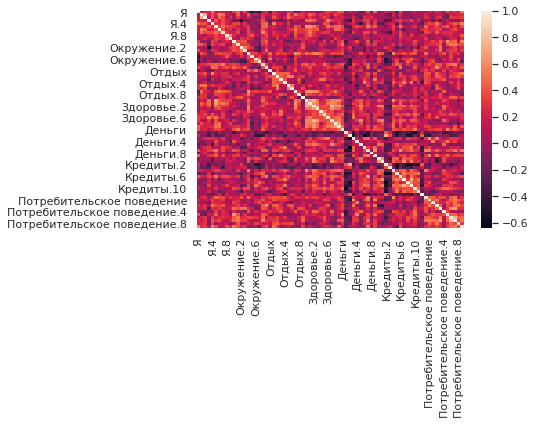

In [7]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(ndata.corr())

In [8]:
data_corr = ndata.corr()
def correlation_analys(index):
    global data_corr
    labels, counts = np.unique(ndata.iloc[:, index].values, return_counts=True)
    plt.bar(labels, counts / 32, align='center')
    plt.gca().set_xticks(labels)
    plt.title(questions[index])
    plt.show()
    return pd.DataFrame({'q': questions.values, 'corr': data_corr.iloc[index].values}).sort_values('corr', ascending=False) #.style.set_caption(questions[index])

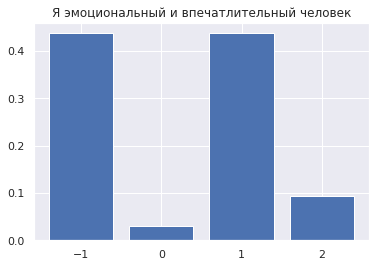

,q,corr
0,Я эмоциональный и впечатлительный человек,1.000000
73,Слово «скидка» обладает для меня магическим в...,0.584798
4,"Мне некомфортно наедине с собой, лучше, если р...",0.505714
49,"Если деньги пришли не по плану, я могу потрати...",0.485433
11,"Других людей я быстро оцениваю, прежде всего, ...",0.449713
...,...,...
20,Я никогда не планирую отдых и поездки. Решение...,-0.284952
16,"Есть близкий человек, который оформил на себя ...",-0.297583
27,"У меня давно не было отдыха, так как на него н...",-0.308762
15,Мои близкие помогают мне выплачивать кредиты,-0.447427


In [9]:
correlation_analys(0)

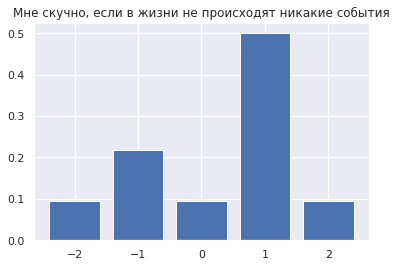

,q,corr
1,"Мне скучно, если в жизни не происходят никакие...",1.000000
2,"Я устаю от рутины, обычная жизнь тяготит меня",0.752479
6,"Я мечтаю получить от жизни гораздо большее, но...",0.598420
27,"У меня давно не было отдыха, так как на него н...",0.518488
7,Моя самооценка меняется от ситуации: то я ощущ...,0.503010
...,...,...
42,Могу легко назвать общую сумму обязательных пл...,-0.098809
52,Я могу легко назвать суммы всех своих минималь...,-0.110215
44,"На нужную и желанную вещь, я готова потратить ...",-0.154103
69,"Есть ряд вещей (товаров, продуктов), приобрест...",-0.162456


In [10]:
correlation_analys(1)

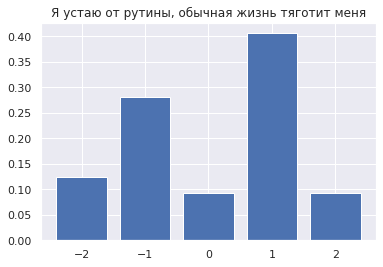

,q,corr
2,"Я устаю от рутины, обычная жизнь тяготит меня",1.000000
1,"Мне скучно, если в жизни не происходят никакие...",0.752479
25,"На отдыхе хочу ярких ощущений, меня привлекает...",0.514193
6,"Я мечтаю получить от жизни гораздо большее, но...",0.474580
4,"Мне некомфортно наедине с собой, лучше, если р...",0.409780
...,...,...
68,На все мои «хочу» в магазине у меня обычно не ...,-0.127425
53,Я помню процентную ставку по каждому своему кр...,-0.145168
16,"Есть близкий человек, который оформил на себя ...",-0.158974
69,"Есть ряд вещей (товаров, продуктов), приобрест...",-0.188798


In [11]:
correlation_analys(2)

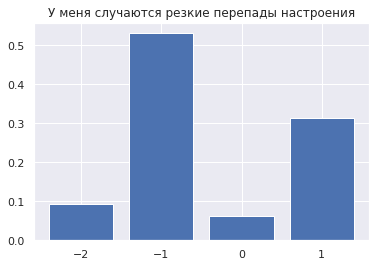

,q,corr
3,У меня случаются резкие перепады настроения,1.000000
36,Я бываю агрессивна и выливаю гнев на окружающих,0.558077
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.486787
30,"Когда я начинаю думать о деньгах, у меня порти...",0.473984
32,"Я испытываю сильный стресс, связанный с финанс...",0.428008
...,...,...
67,"Мне важно быть в тренде, пользоваться гаджетам...",-0.264159
53,Я помню процентную ставку по каждому своему кр...,-0.279391
52,Я могу легко назвать суммы всех своих минималь...,-0.366562
42,Могу легко назвать общую сумму обязательных пл...,-0.398359


In [12]:
correlation_analys(3)

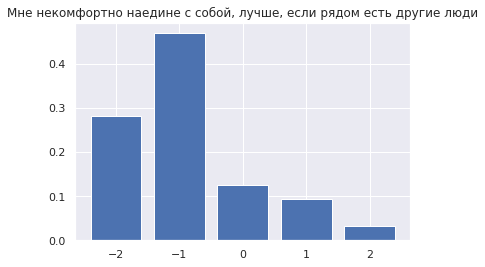

,q,corr
4,"Мне некомфортно наедине с собой, лучше, если р...",1.000000
21,"Если хочется отдохнуть, то покупка путёвки в к...",0.576412
73,Слово «скидка» обладает для меня магическим в...,0.560705
66,"Я покупаю вещи, которые при моём уровне дохода...",0.523524
19,С некоторыми друзьями/родственниками/коллегами...,0.512805
...,...,...
62,Я умеют рассчитать допустимый платёж по кредит...,-0.223554
55,"Я беру новый кредит, чтобы закрыть старый и не...",-0.237548
50,"У меня несколько текущих кредитов, на которые ...",-0.252894
51,Сумма моих кредитных обязательств (кроме ипоте...,-0.273877


In [13]:
correlation_analys(4)

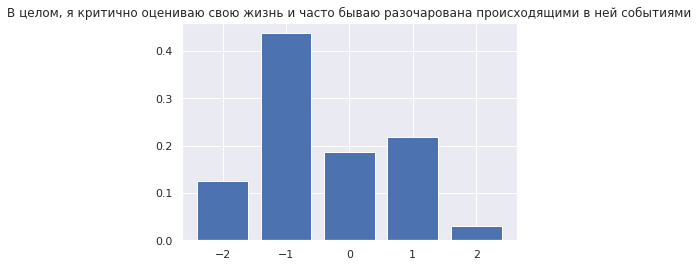

,q,corr
5,"В целом, я критично оцениваю свою жизнь и част...",1.000000
30,"Когда я начинаю думать о деньгах, у меня порти...",0.685321
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.649535
47,Кредит – самый простой и доступный способ реше...,0.544807
56,"Если у меня нет денег, я постараюсь взять ссуд...",0.534646
...,...,...
24,Расходы на отдых в поездках значительные и в к...,-0.033698
17,"В моей семье, как и во многих семьях, бывают к...",-0.173793
52,Я могу легко назвать суммы всех своих минималь...,-0.202831
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.246037


In [14]:
correlation_analys(5)

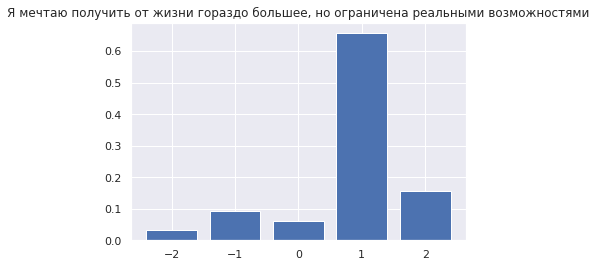

,q,corr
6,"Я мечтаю получить от жизни гораздо большее, но...",1.000000
1,"Мне скучно, если в жизни не происходят никакие...",0.598420
27,"У меня давно не было отдыха, так как на него н...",0.513951
38,У меня сеть проблемы со сном,0.506573
39,Состояние моего здоровья и настроения зависит ...,0.497235
...,...,...
23,На отдыхе часто использую кредитную карту,-0.080903
55,"Я беру новый кредит, чтобы закрыть старый и не...",-0.088925
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.150037
42,Могу легко назвать общую сумму обязательных пл...,-0.232568


In [15]:
correlation_analys(6)

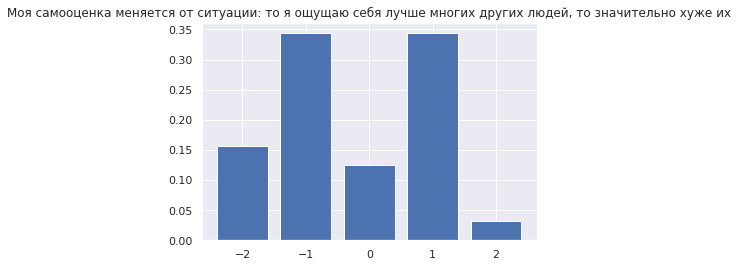

,q,corr
7,Моя самооценка меняется от ситуации: то я ощущ...,1.000000
18,"Мои близкие не знают, что у меня есть ряд кред...",0.565084
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.545455
1,"Мне скучно, если в жизни не происходят никакие...",0.503010
5,"В целом, я критично оцениваю свою жизнь и част...",0.498187
...,...,...
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.121221
62,Я умеют рассчитать допустимый платёж по кредит...,-0.163603
52,Я могу легко назвать суммы всех своих минималь...,-0.172676
42,Могу легко назвать общую сумму обязательных пл...,-0.253619


In [16]:
correlation_analys(7)

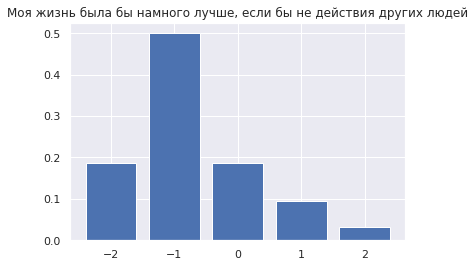

,q,corr
8,"Моя жизнь была бы намного лучше, если бы не де...",1.000000
9,Зачастую в моих бедах виноваты другие люди или...,0.592120
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.443813
27,"У меня давно не было отдыха, так как на него н...",0.425493
15,Мои близкие помогают мне выплачивать кредиты,0.425270
...,...,...
40,"Я испытываю сильный эмоциональный подъём, выпл...",-0.051823
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.097790
48,"Бывает, что по объективным обстоятельствам я н...",-0.108941
43,"Порой я не знаю, куда деваются деньги",-0.111603


In [17]:
correlation_analys(8)

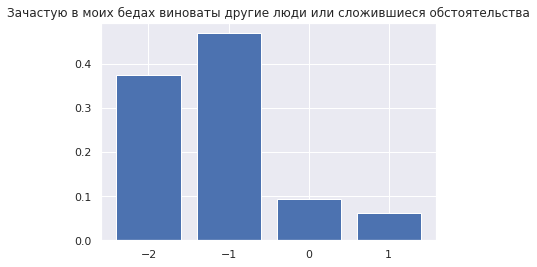

,q,corr
9,Зачастую в моих бедах виноваты другие люди или...,1.000000
8,"Моя жизнь была бы намного лучше, если бы не де...",0.592120
5,"В целом, я критично оцениваю свою жизнь и част...",0.353861
38,У меня сеть проблемы со сном,0.348206
30,"Когда я начинаю думать о деньгах, у меня порти...",0.314713
...,...,...
16,"Есть близкий человек, который оформил на себя ...",-0.106555
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.129759
17,"В моей семье, как и во многих семьях, бывают к...",-0.151073
34,Чувствую себя виноватой перед родными за креди...,-0.220479


In [18]:
correlation_analys(9)

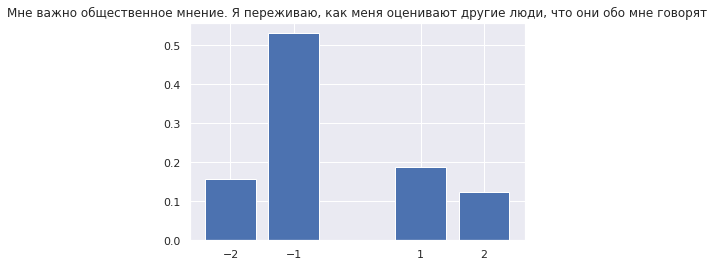

,q,corr
10,"Мне важно общественное мнение. Я переживаю, ка...",1.000000
69,"Есть ряд вещей (товаров, продуктов), приобрест...",0.648083
73,Слово «скидка» обладает для меня магическим в...,0.540459
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.474095
71,"Испытываю тоску, когда не делаю покупок",0.472637
...,...,...
17,"В моей семье, как и во многих семьях, бывают к...",-0.121913
3,У меня случаются резкие перепады настроения,-0.147587
48,"Бывает, что по объективным обстоятельствам я н...",-0.173207
25,"На отдыхе хочу ярких ощущений, меня привлекает...",-0.240202


In [19]:
correlation_analys(10)

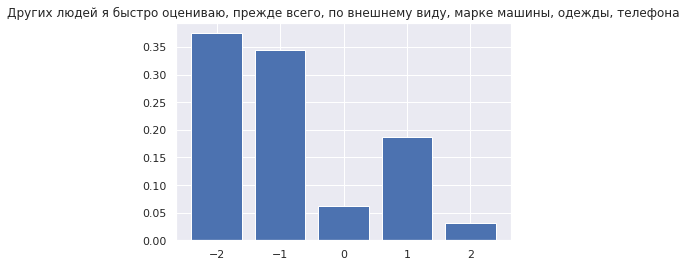

,q,corr
11,"Других людей я быстро оцениваю, прежде всего, ...",1.000000
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.546528
71,"Испытываю тоску, когда не делаю покупок",0.530775
40,"Я испытываю сильный эмоциональный подъём, выпл...",0.517140
0,Я эмоциональный и впечатлительный человек,0.449713
...,...,...
50,"У меня несколько текущих кредитов, на которые ...",-0.087599
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.112253
3,У меня случаются резкие перепады настроения,-0.176527
45,У меня нет накоплений и подушки безопасности,-0.209654


In [20]:
correlation_analys(11)

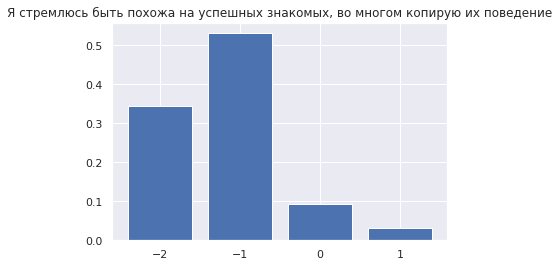

,q,corr
12,"Я стремлюсь быть похожа на успешных знакомых, ...",1.000000
13,"Даже если у меня финансовые ограничения, стрем...",0.544614
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.543596
29,Я чувствую большую усталость и отсутствие радо...,0.423659
63,Я оплачиваю кредитной картой даже незначительн...,0.401907
...,...,...
46,Я решаю финансовые проблемы в последнюю очередь,-0.242978
55,"Я беру новый кредит, чтобы закрыть старый и не...",-0.269726
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.289216
17,"В моей семье, как и во многих семьях, бывают к...",-0.306951


In [21]:
correlation_analys(12)

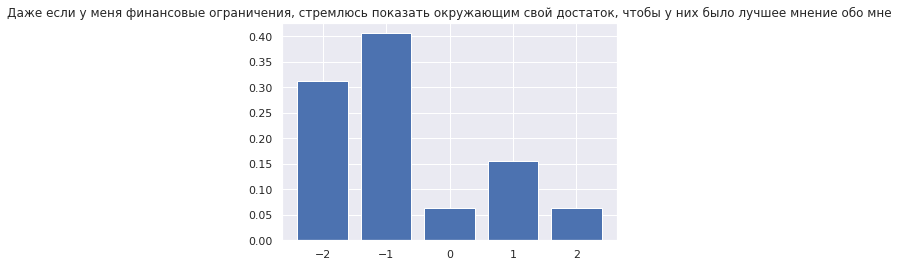

,q,corr
13,"Даже если у меня финансовые ограничения, стрем...",1.000000
12,"Я стремлюсь быть похожа на успешных знакомых, ...",0.544614
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.494012
19,С некоторыми друзьями/родственниками/коллегами...,0.485181
10,"Мне важно общественное мнение. Я переживаю, ка...",0.398787
...,...,...
16,"Есть близкий человек, который оформил на себя ...",-0.156932
24,Расходы на отдых в поездках значительные и в к...,-0.162084
48,"Бывает, что по объективным обстоятельствам я н...",-0.231455
46,Я решаю финансовые проблемы в последнюю очередь,-0.297635


In [22]:
correlation_analys(13)

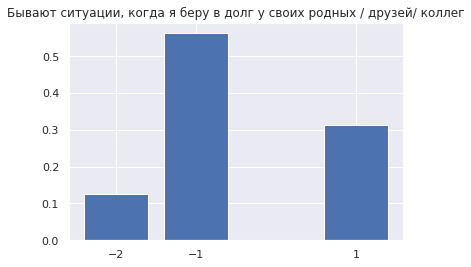

,q,corr
14,"Бывают ситуации, когда я беру в долг у своих р...",1.000000
27,"У меня давно не было отдыха, так как на него н...",0.636576
54,Мои кредитные карты всегда исчерпаны до дна,0.581584
33,"Я часто тревожусь из-за того, что может случит...",0.568216
32,"Я испытываю сильный стресс, связанный с финанс...",0.551322
...,...,...
3,У меня случаются резкие перепады настроения,-0.129159
0,Я эмоциональный и впечатлительный человек,-0.160385
52,Я могу легко назвать суммы всех своих минималь...,-0.178174
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.188614


In [23]:
correlation_analys(14)

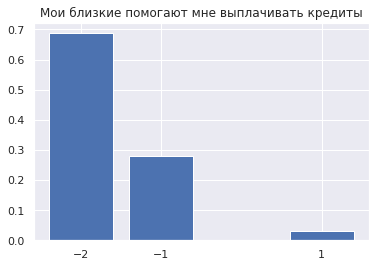

,q,corr
15,Мои близкие помогают мне выплачивать кредиты,1.000000
8,"Моя жизнь была бы намного лучше, если бы не де...",0.425270
17,"В моей семье, как и во многих семьях, бывают к...",0.370340
14,"Бывают ситуации, когда я беру в долг у своих р...",0.362887
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.347351
...,...,...
47,Кредит – самый простой и доступный способ реше...,-0.278327
56,"Если у меня нет денег, я постараюсь взять ссуд...",-0.294798
26,Отдых без трат скучный и неинтересный. В нём н...,-0.301941
38,У меня сеть проблемы со сном,-0.321634


In [24]:
correlation_analys(15)

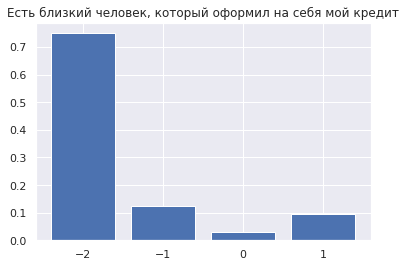

,q,corr
16,"Есть близкий человек, который оформил на себя ...",1.000000
17,"В моей семье, как и во многих семьях, бывают к...",0.568621
20,Я никогда не планирую отдых и поездки. Решение...,0.517094
59,"Когда я беру кредит, главное для меня – его су...",0.505591
50,"У меня несколько текущих кредитов, на которые ...",0.378528
...,...,...
12,"Я стремлюсь быть похожа на успешных знакомых, ...",-0.238781
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.252703
0,Я эмоциональный и впечатлительный человек,-0.297583
42,Могу легко назвать общую сумму обязательных пл...,-0.405585


In [25]:
correlation_analys(16)

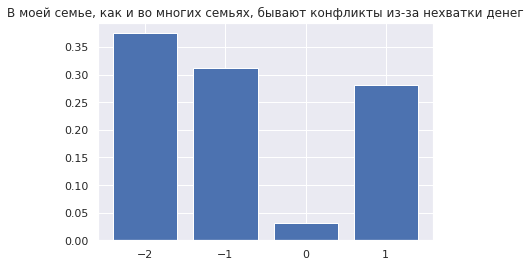

,q,corr
17,"В моей семье, как и во многих семьях, бывают к...",1.000000
16,"Есть близкий человек, который оформил на себя ...",0.568621
58,"Бывает, что я предоставляю кредитору недостове...",0.462298
65,"Большинство моих вещей, особенно ценных, купле...",0.394318
55,"Я беру новый кредит, чтобы закрыть старый и не...",0.378574
...,...,...
13,"Даже если у меня финансовые ограничения, стрем...",-0.329956
53,Я помню процентную ставку по каждому своему кр...,-0.373538
52,Я могу легко назвать суммы всех своих минималь...,-0.447483
42,Могу легко назвать общую сумму обязательных пл...,-0.457831


In [26]:
correlation_analys(17)

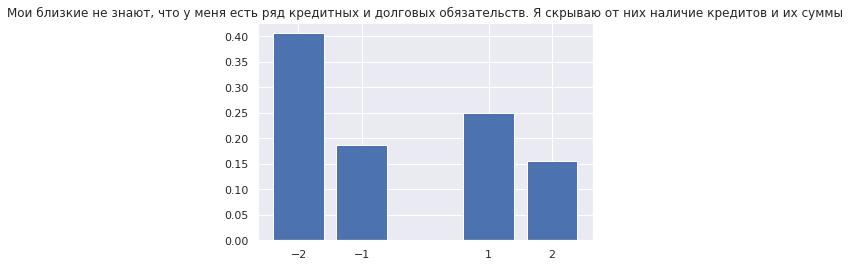

,q,corr
18,"Мои близкие не знают, что у меня есть ряд кред...",1.000000
71,"Испытываю тоску, когда не делаю покупок",0.565252
7,Моя самооценка меняется от ситуации: то я ощущ...,0.565084
35,"У меня есть страхи, что всё откроется (кредиты...",0.519112
30,"Когда я начинаю думать о деньгах, у меня порти...",0.494824
...,...,...
62,Я умеют рассчитать допустимый платёж по кредит...,-0.109750
53,Я помню процентную ставку по каждому своему кр...,-0.180936
52,Я могу легко назвать суммы всех своих минималь...,-0.232825
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.254083


In [27]:
correlation_analys(18)

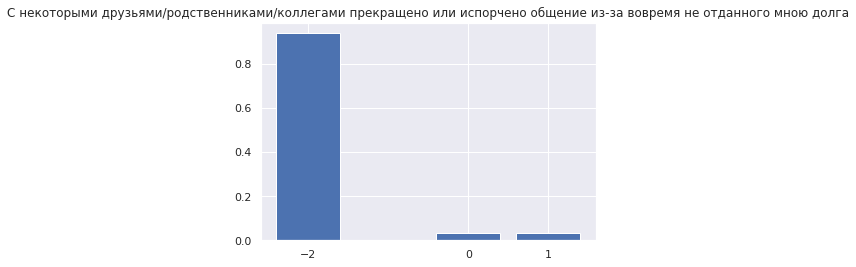

,q,corr
19,С некоторыми друзьями/родственниками/коллегами...,1.000000
66,"Я покупаю вещи, которые при моём уровне дохода...",0.622306
56,"Если у меня нет денег, я постараюсь взять ссуд...",0.559486
4,"Мне некомфортно наедине с собой, лучше, если р...",0.512805
13,"Даже если у меня финансовые ограничения, стрем...",0.485181
...,...,...
46,Я решаю финансовые проблемы в последнюю очередь,-0.180427
50,"У меня несколько текущих кредитов, на которые ...",-0.203213
24,Расходы на отдых в поездках значительные и в к...,-0.235703
17,"В моей семье, как и во многих семьях, бывают к...",-0.253027


In [28]:
correlation_analys(19)

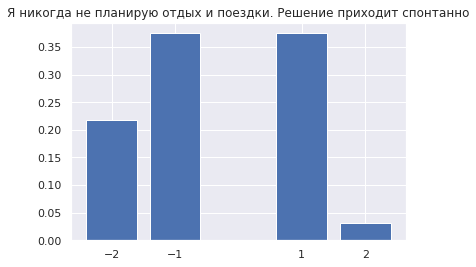

,q,corr
20,Я никогда не планирую отдых и поездки. Решение...,1.000000
16,"Есть близкий человек, который оформил на себя ...",0.517094
14,"Бывают ситуации, когда я беру в долг у своих р...",0.464489
27,"У меня давно не было отдыха, так как на него н...",0.433508
50,"У меня несколько текущих кредитов, на которые ...",0.371938
...,...,...
49,"Если деньги пришли не по плану, я могу потрати...",-0.192380
3,У меня случаются резкие перепады настроения,-0.212975
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.235826
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.242769


In [29]:
correlation_analys(20)

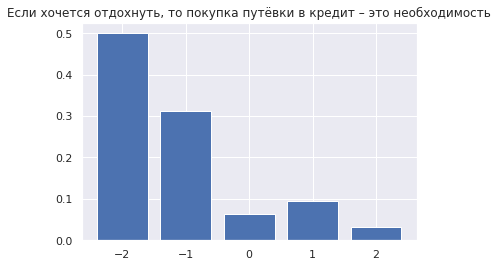

,q,corr
21,"Если хочется отдохнуть, то покупка путёвки в к...",1.000000
4,"Мне некомфортно наедине с собой, лучше, если р...",0.576412
73,Слово «скидка» обладает для меня магическим в...,0.504879
25,"На отдыхе хочу ярких ощущений, меня привлекает...",0.470659
22,На отдыхе не стоит себе ни в чём не отказывать...,0.449727
...,...,...
44,"На нужную и желанную вещь, я готова потратить ...",-0.062676
17,"В моей семье, как и во многих семьях, бывают к...",-0.068232
29,Я чувствую большую усталость и отсутствие радо...,-0.087135
51,Сумма моих кредитных обязательств (кроме ипоте...,-0.112647


In [30]:
correlation_analys(21)

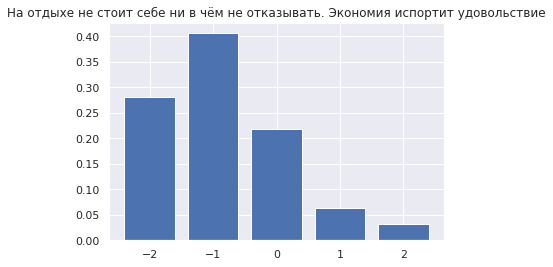

,q,corr
22,На отдыхе не стоит себе ни в чём не отказывать...,1.000000
25,"На отдыхе хочу ярких ощущений, меня привлекает...",0.601694
26,Отдых без трат скучный и неинтересный. В нём н...,0.525270
66,"Я покупаю вещи, которые при моём уровне дохода...",0.461594
72,Рядом купленных вещей/ курсов / услуг не польз...,0.449727
...,...,...
42,Могу легко назвать общую сумму обязательных пл...,-0.125963
53,Я помню процентную ставку по каждому своему кр...,-0.153617
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.197408
48,"Бывает, что по объективным обстоятельствам я н...",-0.247196


In [31]:
correlation_analys(22)

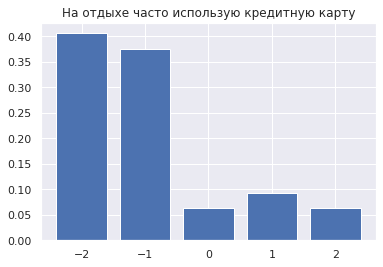

,q,corr
23,На отдыхе часто использую кредитную карту,1.000000
49,"Если деньги пришли не по плану, я могу потрати...",0.539767
34,Чувствую себя виноватой перед родными за креди...,0.509561
35,"У меня есть страхи, что всё откроется (кредиты...",0.487075
22,На отдыхе не стоит себе ни в чём не отказывать...,0.442516
...,...,...
29,Я чувствую большую усталость и отсутствие радо...,-0.102575
44,"На нужную и желанную вещь, я готова потратить ...",-0.106350
62,Я умеют рассчитать допустимый платёж по кредит...,-0.147826
3,У меня случаются резкие перепады настроения,-0.246375


In [32]:
correlation_analys(23)

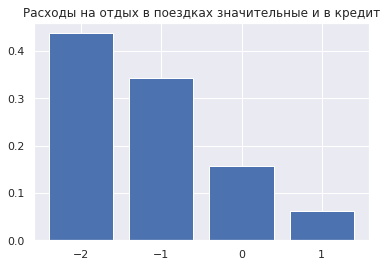

,q,corr
24,Расходы на отдых в поездках значительные и в к...,1.000000
46,Я решаю финансовые проблемы в последнюю очередь,0.568730
57,Я всегда стремлюсь получить максимально большо...,0.563206
59,"Когда я беру кредит, главное для меня – его су...",0.534850
21,"Если хочется отдохнуть, то покупка путёвки в к...",0.449177
...,...,...
29,Я чувствую большую усталость и отсутствие радо...,-0.234683
19,С некоторыми друзьями/родственниками/коллегами...,-0.235703
53,Я помню процентную ставку по каждому своему кр...,-0.259046
62,Я умеют рассчитать допустимый платёж по кредит...,-0.303644


In [33]:
correlation_analys(24)

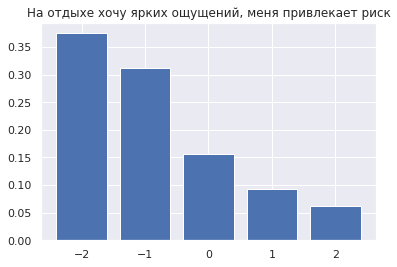

,q,corr
25,"На отдыхе хочу ярких ощущений, меня привлекает...",1.000000
22,На отдыхе не стоит себе ни в чём не отказывать...,0.601694
26,Отдых без трат скучный и неинтересный. В нём н...,0.581345
2,"Я устаю от рутины, обычная жизнь тяготит меня",0.514193
1,"Мне скучно, если в жизни не происходят никакие...",0.498370
...,...,...
50,"У меня несколько текущих кредитов, на которые ...",-0.172032
15,Мои близкие помогают мне выплачивать кредиты,-0.195164
53,Я помню процентную ставку по каждому своему кр...,-0.202881
10,"Мне важно общественное мнение. Я переживаю, ка...",-0.240202


In [34]:
correlation_analys(25)

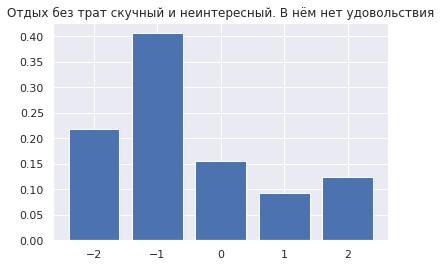

,q,corr
26,Отдых без трат скучный и неинтересный. В нём н...,1.000000
25,"На отдыхе хочу ярких ощущений, меня привлекает...",0.581345
22,На отдыхе не стоит себе ни в чём не отказывать...,0.525270
66,"Я покупаю вещи, которые при моём уровне дохода...",0.416347
72,Рядом купленных вещей/ курсов / услуг не польз...,0.392553
...,...,...
65,"Большинство моих вещей, особенно ценных, купле...",-0.206504
17,"В моей семье, как и во многих семьях, бывают к...",-0.211341
48,"Бывает, что по объективным обстоятельствам я н...",-0.222375
53,Я помню процентную ставку по каждому своему кр...,-0.293135


In [35]:
correlation_analys(26)

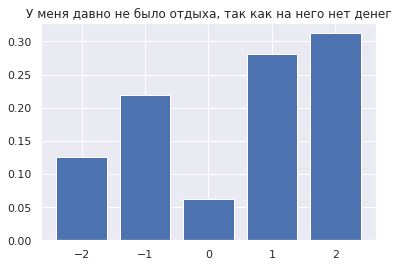

,q,corr
27,"У меня давно не было отдыха, так как на него н...",1.000000
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.640815
14,"Бывают ситуации, когда я беру в долг у своих р...",0.636576
32,"Я испытываю сильный стресс, связанный с финанс...",0.590752
30,"Когда я начинаю думать о деньгах, у меня порти...",0.558668
...,...,...
49,"Если деньги пришли не по плану, я могу потрати...",-0.141750
52,Я могу легко назвать суммы всех своих минималь...,-0.157588
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.175208
53,Я помню процентную ставку по каждому своему кр...,-0.175798


In [36]:
correlation_analys(27)

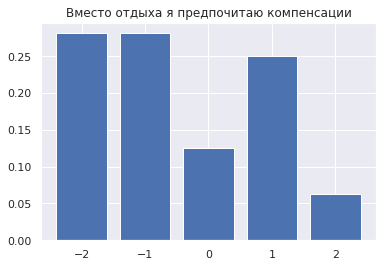

,q,corr
28,Вместо отдыха я предпочитаю компенсации,1.000000
14,"Бывают ситуации, когда я беру в долг у своих р...",0.510458
30,"Когда я начинаю думать о деньгах, у меня порти...",0.443233
23,На отдыхе часто использую кредитную карту,0.395195
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.384930
...,...,...
0,Я эмоциональный и впечатлительный человек,-0.113254
73,Слово «скидка» обладает для меня магическим в...,-0.118236
52,Я могу легко назвать суммы всех своих минималь...,-0.235172
29,Я чувствую большую усталость и отсутствие радо...,-0.256079


In [37]:
correlation_analys(28)

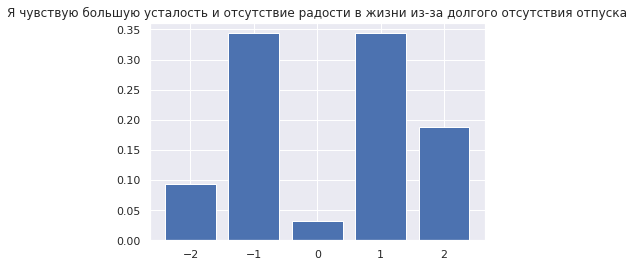

,q,corr
29,Я чувствую большую усталость и отсутствие радо...,1.000000
71,"Испытываю тоску, когда не делаю покупок",0.459335
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.433991
12,"Я стремлюсь быть похожа на успешных знакомых, ...",0.423659
18,"Мои близкие не знают, что у меня есть ряд кред...",0.395024
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.206014
24,Расходы на отдых в поездках значительные и в к...,-0.234683
28,Вместо отдыха я предпочитаю компенсации,-0.256079
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.259540


In [38]:
correlation_analys(29)

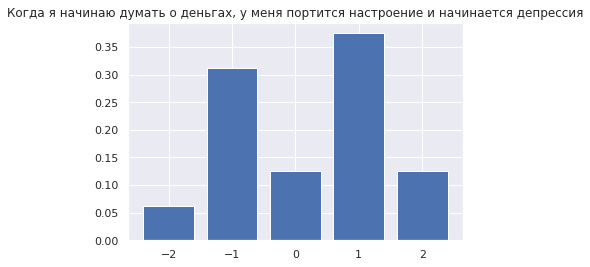

,q,corr
30,"Когда я начинаю думать о деньгах, у меня порти...",1.000000
32,"Я испытываю сильный стресс, связанный с финанс...",0.763032
5,"В целом, я критично оцениваю свою жизнь и част...",0.685321
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.663886
54,Мои кредитные карты всегда исчерпаны до дна,0.605888
...,...,...
26,Отдых без трат скучный и неинтересный. В нём н...,-0.103506
22,На отдыхе не стоит себе ни в чём не отказывать...,-0.103553
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.218830
52,Я могу легко назвать суммы всех своих минималь...,-0.225130


In [39]:
correlation_analys(30)

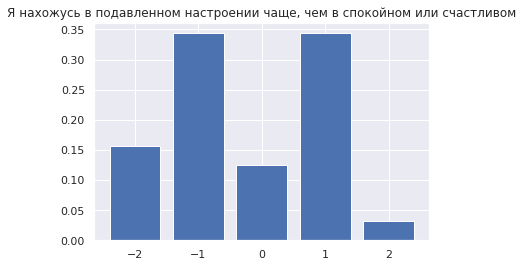

,q,corr
31,"Я нахожусь в подавленном настроении чаще, чем ...",1.000000
30,"Когда я начинаю думать о деньгах, у меня порти...",0.663886
5,"В целом, я критично оцениваю свою жизнь и част...",0.649535
32,"Я испытываю сильный стресс, связанный с финанс...",0.641930
27,"У меня давно не было отдыха, так как на него н...",0.640815
...,...,...
52,Я могу легко назвать суммы всех своих минималь...,-0.103606
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.121221
12,"Я стремлюсь быть похожа на успешных знакомых, ...",-0.128446
42,Могу легко назвать общую сумму обязательных пл...,-0.152171


In [40]:
correlation_analys(31)

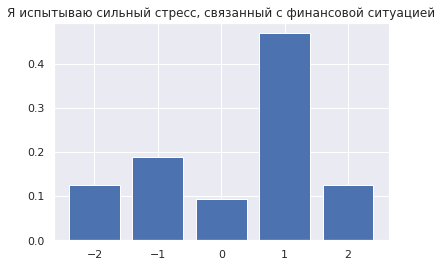

,q,corr
32,"Я испытываю сильный стресс, связанный с финанс...",1.000000
37,Из-за финансовых проблем я чувствую себя в туп...,0.802967
30,"Когда я начинаю думать о деньгах, у меня порти...",0.763032
33,"Я часто тревожусь из-за того, что может случит...",0.654868
39,Состояние моего здоровья и настроения зависит ...,0.644582
...,...,...
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.150135
42,Могу легко назвать общую сумму обязательных пл...,-0.282196
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.293970
52,Я могу легко назвать суммы всех своих минималь...,-0.318431


In [41]:
correlation_analys(32)

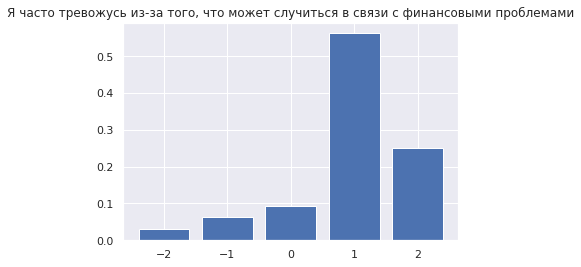

,q,corr
33,"Я часто тревожусь из-за того, что может случит...",1.000000
32,"Я испытываю сильный стресс, связанный с финанс...",0.654868
37,Из-за финансовых проблем я чувствую себя в туп...,0.627353
14,"Бывают ситуации, когда я беру в долг у своих р...",0.568216
27,"У меня давно не было отдыха, так как на него н...",0.533818
...,...,...
4,"Мне некомфортно наедине с собой, лучше, если р...",-0.122716
42,Могу легко назвать общую сумму обязательных пл...,-0.175252
52,Я могу легко назвать суммы всех своих минималь...,-0.213330
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.235500


In [42]:
correlation_analys(33)

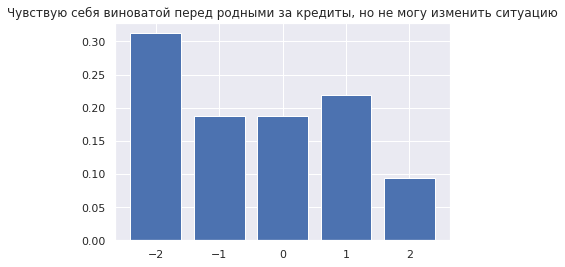

,q,corr
34,Чувствую себя виноватой перед родными за креди...,1.000000
35,"У меня есть страхи, что всё откроется (кредиты...",0.562779
23,На отдыхе часто использую кредитную карту,0.509561
14,"Бывают ситуации, когда я беру в долг у своих р...",0.442127
37,Из-за финансовых проблем я чувствую себя в туп...,0.391193
...,...,...
47,Кредит – самый простой и доступный способ реше...,-0.058052
25,"На отдыхе хочу ярких ощущений, меня привлекает...",-0.075542
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.159450
53,Я помню процентную ставку по каждому своему кр...,-0.188056


In [43]:
correlation_analys(34)

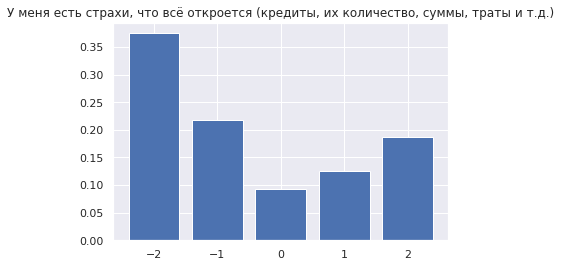

,q,corr
35,"У меня есть страхи, что всё откроется (кредиты...",1.000000
34,Чувствую себя виноватой перед родными за креди...,0.562779
18,"Мои близкие не знают, что у меня есть ряд кред...",0.519112
23,На отдыхе часто использую кредитную карту,0.487075
36,Я бываю агрессивна и выливаю гнев на окружающих,0.478333
...,...,...
48,"Бывает, что по объективным обстоятельствам я н...",-0.191645
62,Я умеют рассчитать допустимый платёж по кредит...,-0.247820
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.284025
53,Я помню процентную ставку по каждому своему кр...,-0.320736


In [44]:
correlation_analys(35)

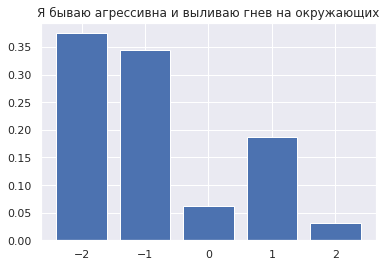

,q,corr
36,Я бываю агрессивна и выливаю гнев на окружающих,1.000000
3,У меня случаются резкие перепады настроения,0.558077
43,"Порой я не знаю, куда деваются деньги",0.543033
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.537745
5,"В целом, я критично оцениваю свою жизнь и част...",0.517616
...,...,...
52,Я могу легко назвать суммы всех своих минималь...,-0.147421
15,Мои близкие помогают мне выплачивать кредиты,-0.155130
24,Расходы на отдых в поездках значительные и в к...,-0.178644
42,Могу легко назвать общую сумму обязательных пл...,-0.204151


In [45]:
correlation_analys(36)

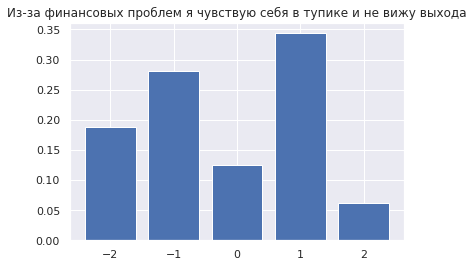

,q,corr
37,Из-за финансовых проблем я чувствую себя в туп...,1.000000
32,"Я испытываю сильный стресс, связанный с финанс...",0.802967
33,"Я часто тревожусь из-за того, что может случит...",0.627353
45,У меня нет накоплений и подушки безопасности,0.621382
30,"Когда я начинаю думать о деньгах, у меня порти...",0.588624
...,...,...
29,Я чувствую большую усталость и отсутствие радо...,-0.146399
66,"Я покупаю вещи, которые при моём уровне дохода...",-0.153949
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.157330
53,Я помню процентную ставку по каждому своему кр...,-0.232642


In [46]:
correlation_analys(37)

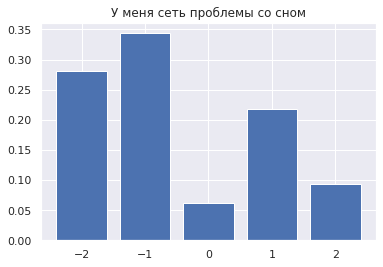

,q,corr
38,У меня сеть проблемы со сном,1.000000
39,Состояние моего здоровья и настроения зависит ...,0.674633
32,"Я испытываю сильный стресс, связанный с финанс...",0.600701
30,"Когда я начинаю думать о деньгах, у меня порти...",0.568436
31,"Я нахожусь в подавленном настроении чаще, чем ...",0.554265
...,...,...
17,"В моей семье, как и во многих семьях, бывают к...",-0.142937
42,Могу легко назвать общую сумму обязательных пл...,-0.147266
70,У меня нарастающая тяга к покупкам дорогих вещ...,-0.151362
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.223017


In [47]:
correlation_analys(38)

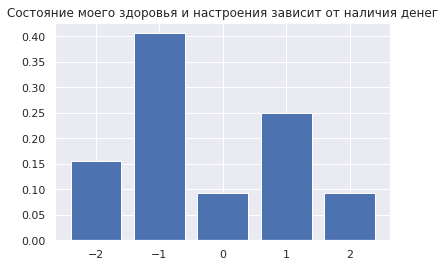

,q,corr
39,Состояние моего здоровья и настроения зависит ...,1.000000
38,У меня сеть проблемы со сном,0.674633
32,"Я испытываю сильный стресс, связанный с финанс...",0.644582
30,"Когда я начинаю думать о деньгах, у меня порти...",0.560782
37,Из-за финансовых проблем я чувствую себя в туп...,0.558746
...,...,...
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.074934
17,"В моей семье, как и во многих семьях, бывают к...",-0.082362
52,Я могу легко назвать суммы всех своих минималь...,-0.090021
15,Мои близкие помогают мне выплачивать кредиты,-0.177188


In [48]:
correlation_analys(39)

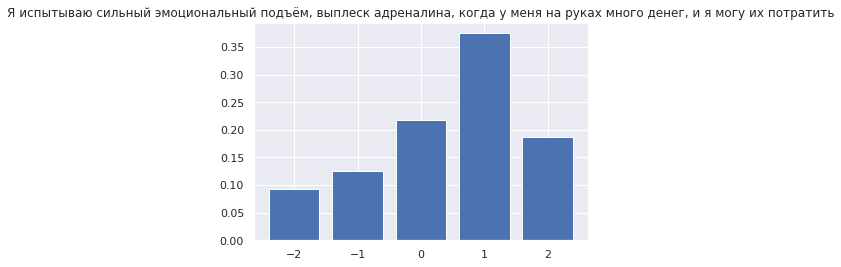

,q,corr
40,"Я испытываю сильный эмоциональный подъём, выпл...",1.000000
69,"Есть ряд вещей (товаров, продуктов), приобрест...",0.590571
60,"Для меня важно, сколько я могу взять по кредит...",0.536708
39,Состояние моего здоровья и настроения зависит ...,0.518267
11,"Других людей я быстро оцениваю, прежде всего, ...",0.517140
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.085825
42,Могу легко назвать общую сумму обязательных пл...,-0.136610
52,Я могу легко назвать суммы всех своих минималь...,-0.143744
15,Мои близкие помогают мне выплачивать кредиты,-0.170779


In [49]:
correlation_analys(40)

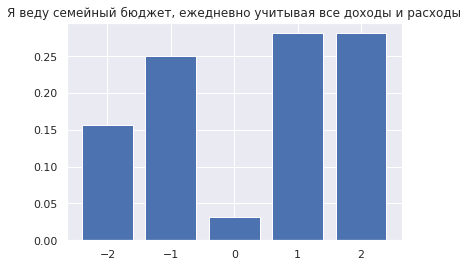

,q,corr
41,"Я веду семейный бюджет, ежедневно учитывая все...",1.000000
52,Я могу легко назвать суммы всех своих минималь...,0.421846
42,Могу легко назвать общую сумму обязательных пл...,0.295598
53,Я помню процентную ставку по каждому своему кр...,0.236071
62,Я умеют рассчитать допустимый платёж по кредит...,0.190185
...,...,...
59,"Когда я беру кредит, главное для меня – его су...",-0.426624
43,"Порой я не знаю, куда деваются деньги",-0.461955
55,"Я беру новый кредит, чтобы закрыть старый и не...",-0.487984
47,Кредит – самый простой и доступный способ реше...,-0.500503


In [50]:
correlation_analys(41)

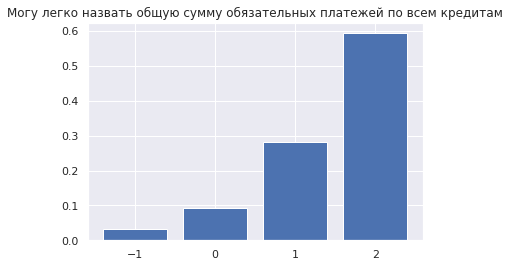

,q,corr
42,Могу легко назвать общую сумму обязательных пл...,1.000000
52,Я могу легко назвать суммы всех своих минималь...,0.740799
62,Я умеют рассчитать допустимый платёж по кредит...,0.444717
53,Я помню процентную ставку по каждому своему кр...,0.362725
12,"Я стремлюсь быть похожа на успешных знакомых, ...",0.307148
...,...,...
47,Кредит – самый простой и доступный способ реше...,-0.469595
59,"Когда я беру кредит, главное для меня – его су...",-0.487083
43,"Порой я не знаю, куда деваются деньги",-0.518928
58,"Бывает, что я предоставляю кредитору недостове...",-0.544487


In [51]:
correlation_analys(42)

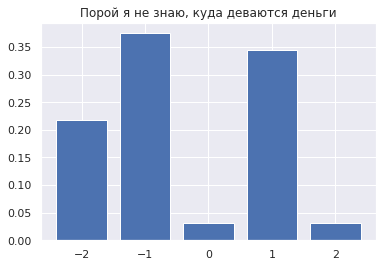

,q,corr
43,"Порой я не знаю, куда деваются деньги",1.000000
64,Мои покупки носят спонтанный характер,0.671582
66,"Я покупаю вещи, которые при моём уровне дохода...",0.566736
36,Я бываю агрессивна и выливаю гнев на окружающих,0.543033
35,"У меня есть страхи, что всё откроется (кредиты...",0.470342
...,...,...
12,"Я стремлюсь быть похожа на успешных знакомых, ...",-0.222247
62,Я умеют рассчитать допустимый платёж по кредит...,-0.303374
52,Я могу легко назвать суммы всех своих минималь...,-0.366849
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.461955


In [52]:
correlation_analys(43)

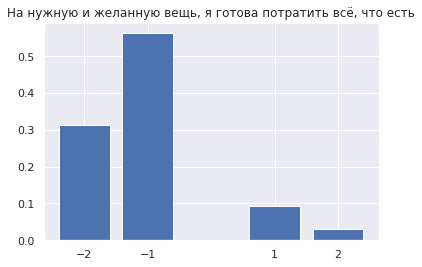

,q,corr
44,"На нужную и желанную вещь, я готова потратить ...",1.000000
69,"Есть ряд вещей (товаров, продуктов), приобрест...",0.584012
65,"Большинство моих вещей, особенно ценных, купле...",0.545530
10,"Мне важно общественное мнение. Я переживаю, ка...",0.406836
40,"Я испытываю сильный эмоциональный подъём, выпл...",0.383038
...,...,...
1,"Мне скучно, если в жизни не происходят никакие...",-0.154103
26,Отдых без трат скучный и неинтересный. В нём н...,-0.186895
9,Зачастую в моих бедах виноваты другие люди или...,-0.234690
22,На отдыхе не стоит себе ни в чём не отказывать...,-0.311634


In [53]:
correlation_analys(44)

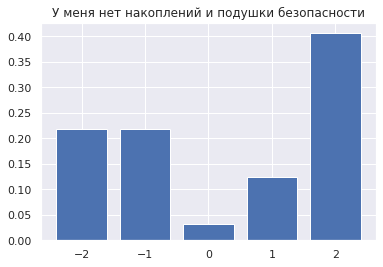

,q,corr
45,У меня нет накоплений и подушки безопасности,1.000000
37,Из-за финансовых проблем я чувствую себя в туп...,0.621382
32,"Я испытываю сильный стресс, связанный с финанс...",0.545776
50,"У меня несколько текущих кредитов, на которые ...",0.501188
68,На все мои «хочу» в магазине у меня обычно не ...,0.483009
...,...,...
0,Я эмоциональный и впечатлительный человек,-0.216345
52,Я могу легко назвать суммы всех своих минималь...,-0.272983
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.323354
53,Я помню процентную ставку по каждому своему кр...,-0.346657


In [54]:
correlation_analys(45)

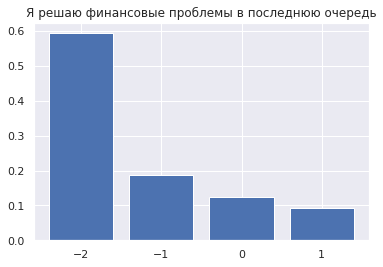

,q,corr
46,Я решаю финансовые проблемы в последнюю очередь,1.000000
24,Расходы на отдых в поездках значительные и в к...,0.568730
59,"Когда я беру кредит, главное для меня – его су...",0.537503
49,"Если деньги пришли не по плану, я могу потрати...",0.495446
43,"Порой я не знаю, куда деваются деньги",0.456557
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.288428
13,"Даже если у меня финансовые ограничения, стрем...",-0.297635
52,Я могу легко назвать суммы всех своих минималь...,-0.353450
62,Я умеют рассчитать допустимый платёж по кредит...,-0.426685


In [55]:
correlation_analys(46)

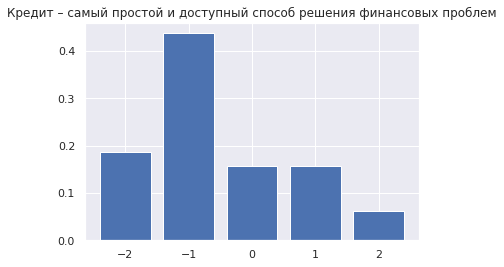

,q,corr
47,Кредит – самый простой и доступный способ реше...,1.000000
56,"Если у меня нет денег, я постараюсь взять ссуд...",0.697584
49,"Если деньги пришли не по плану, я могу потрати...",0.599708
63,Я оплачиваю кредитной картой даже незначительн...,0.578313
64,Мои покупки носят спонтанный характер,0.551456
...,...,...
15,Мои близкие помогают мне выплачивать кредиты,-0.278327
52,Я могу легко назвать суммы всех своих минималь...,-0.322670
62,Я умеют рассчитать допустимый платёж по кредит...,-0.362413
42,Могу легко назвать общую сумму обязательных пл...,-0.469595


In [56]:
correlation_analys(47)

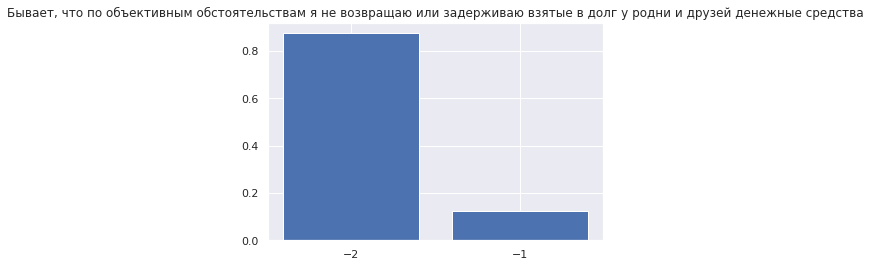

,q,corr
48,"Бывает, что по объективным обстоятельствам я н...",1.000000
5,"В целом, я критично оцениваю свою жизнь и част...",0.324210
2,"Я устаю от рутины, обычная жизнь тяготит меня",0.283828
53,Я помню процентную ставку по каждому своему кр...,0.259875
27,"У меня давно не было отдыха, так как на него н...",0.214037
...,...,...
26,Отдых без трат скучный и неинтересный. В нём н...,-0.222375
13,"Даже если у меня финансовые ограничения, стрем...",-0.231455
0,Я эмоциональный и впечатлительный человек,-0.235756
22,На отдыхе не стоит себе ни в чём не отказывать...,-0.247196


In [57]:
correlation_analys(48)

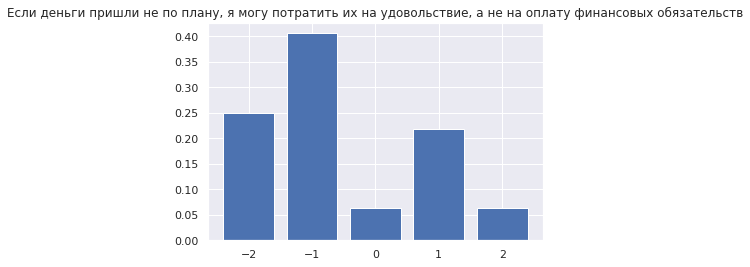

,q,corr
49,"Если деньги пришли не по плану, я могу потрати...",1.000000
47,Кредит – самый простой и доступный способ реше...,0.599708
64,Мои покупки носят спонтанный характер,0.598662
23,На отдыхе часто использую кредитную карту,0.539767
66,"Я покупаю вещи, которые при моём уровне дохода...",0.509755
...,...,...
20,Я никогда не планирую отдых и поездки. Решение...,-0.192380
62,Я умеют рассчитать допустимый платёж по кредит...,-0.239363
52,Я могу легко назвать суммы всех своих минималь...,-0.245985
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.302567


In [58]:
correlation_analys(49)

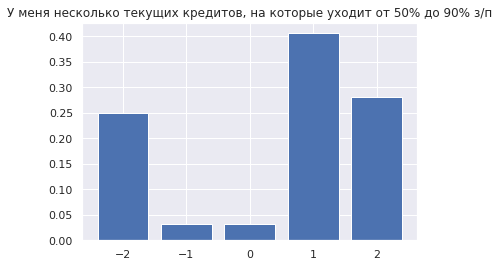

,q,corr
50,"У меня несколько текущих кредитов, на которые ...",1.000000
51,Сумма моих кредитных обязательств (кроме ипоте...,0.642238
32,"Я испытываю сильный стресс, связанный с финанс...",0.615087
37,Из-за финансовых проблем я чувствую себя в туп...,0.525108
45,У меня нет накоплений и подушки безопасности,0.501188
...,...,...
52,Я могу легко назвать суммы всех своих минималь...,-0.199434
19,С некоторыми друзьями/родственниками/коллегами...,-0.203213
4,"Мне некомфортно наедине с собой, лучше, если р...",-0.252894
66,"Я покупаю вещи, которые при моём уровне дохода...",-0.327120


In [59]:
correlation_analys(50)

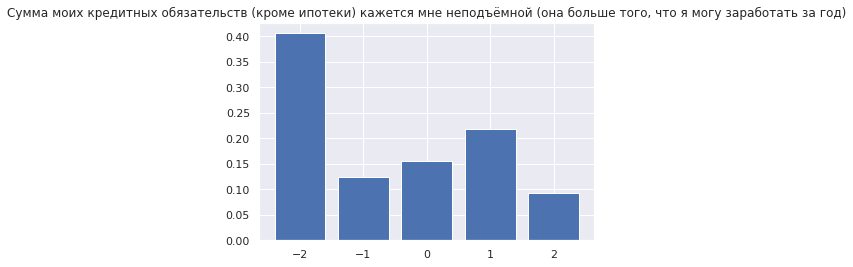

,q,corr
51,Сумма моих кредитных обязательств (кроме ипоте...,1.000000
50,"У меня несколько текущих кредитов, на которые ...",0.642238
57,Я всегда стремлюсь получить максимально большо...,0.610225
59,"Когда я беру кредит, главное для меня – его су...",0.584588
32,"Я испытываю сильный стресс, связанный с финанс...",0.568127
...,...,...
26,Отдых без трат скучный и неинтересный. В нём н...,-0.196348
72,Рядом купленных вещей/ курсов / услуг не польз...,-0.212225
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.237876
4,"Мне некомфортно наедине с собой, лучше, если р...",-0.273877


In [60]:
correlation_analys(51)

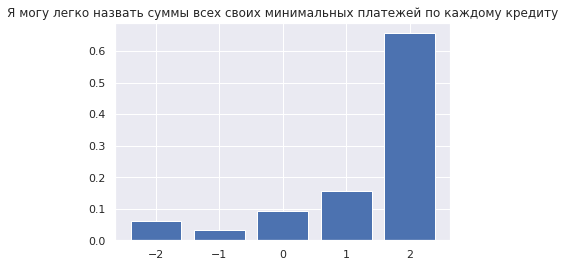

,q,corr
52,Я могу легко назвать суммы всех своих минималь...,1.000000
42,Могу легко назвать общую сумму обязательных пл...,0.740799
62,Я умеют рассчитать допустимый платёж по кредит...,0.449398
41,"Я веду семейный бюджет, ежедневно учитывая все...",0.421846
53,Я помню процентную ставку по каждому своему кр...,0.405146
...,...,...
59,"Когда я беру кредит, главное для меня – его су...",-0.519719
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.526057
16,"Есть близкий человек, который оформил на себя ...",-0.539651
55,"Я беру новый кредит, чтобы закрыть старый и не...",-0.574349


In [61]:
correlation_analys(52)

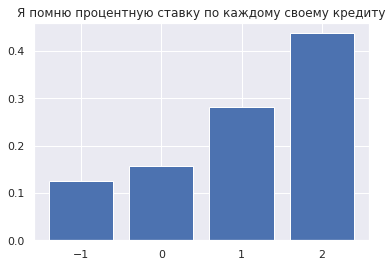

,q,corr
53,Я помню процентную ставку по каждому своему кр...,1.000000
52,Я могу легко назвать суммы всех своих минималь...,0.405146
42,Могу легко назвать общую сумму обязательных пл...,0.362725
48,"Бывает, что по объективным обстоятельствам я н...",0.259875
73,Слово «скидка» обладает для меня магическим в...,0.240505
...,...,...
32,"Я испытываю сильный стресс, связанный с финанс...",-0.363754
17,"В моей семье, как и во многих семьях, бывают к...",-0.373538
7,Моя самооценка меняется от ситуации: то я ощущ...,-0.376033
59,"Когда я беру кредит, главное для меня – его су...",-0.408317


In [62]:
correlation_analys(53)

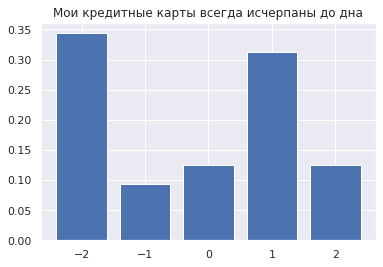

,q,corr
54,Мои кредитные карты всегда исчерпаны до дна,1.000000
30,"Когда я начинаю думать о деньгах, у меня порти...",0.605888
14,"Бывают ситуации, когда я беру в долг у своих р...",0.581584
63,Я оплачиваю кредитной картой даже незначительн...,0.578371
32,"Я испытываю сильный стресс, связанный с финанс...",0.532300
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.095641
42,Могу легко назвать общую сумму обязательных пл...,-0.210607
52,Я могу легко назвать суммы всех своих минималь...,-0.213394
62,Я умеют рассчитать допустимый платёж по кредит...,-0.225880


In [63]:
correlation_analys(54)

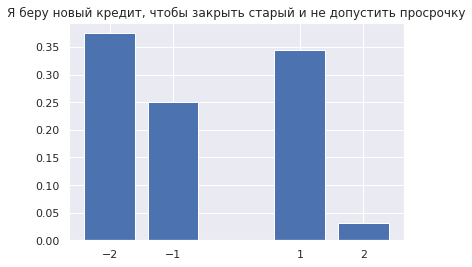

,q,corr
55,"Я беру новый кредит, чтобы закрыть старый и не...",1.000000
57,Я всегда стремлюсь получить максимально большо...,0.547752
61,Я ищу «лёгкие» кредиты (которые могу взять без...,0.533669
18,"Мои близкие не знают, что у меня есть ряд кред...",0.458804
60,"Для меня важно, сколько я могу взять по кредит...",0.452723
...,...,...
12,"Я стремлюсь быть похожа на успешных знакомых, ...",-0.269726
42,Могу легко назвать общую сумму обязательных пл...,-0.455349
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.487984
53,Я помню процентную ставку по каждому своему кр...,-0.555962


In [64]:
correlation_analys(55)

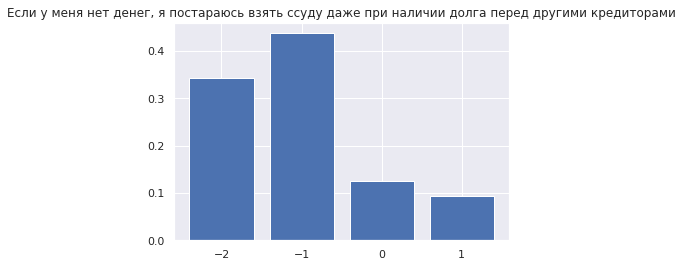

,q,corr
56,"Если у меня нет денег, я постараюсь взять ссуд...",1.000000
47,Кредит – самый простой и доступный способ реше...,0.697584
19,С некоторыми друзьями/родственниками/коллегами...,0.559486
5,"В целом, я критично оцениваю свою жизнь и част...",0.534646
59,"Когда я беру кредит, главное для меня – его су...",0.514879
...,...,...
52,Я могу легко назвать суммы всех своих минималь...,-0.196667
17,"В моей семье, как и во многих семьях, бывают к...",-0.217478
42,Могу легко назвать общую сумму обязательных пл...,-0.240263
15,Мои близкие помогают мне выплачивать кредиты,-0.294798


In [65]:
correlation_analys(56)

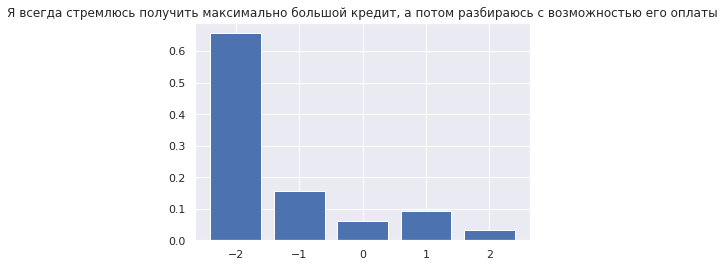

,q,corr
57,Я всегда стремлюсь получить максимально большо...,1.000000
59,"Когда я беру кредит, главное для меня – его су...",0.735056
51,Сумма моих кредитных обязательств (кроме ипоте...,0.610225
24,Расходы на отдых в поездках значительные и в к...,0.563206
55,"Я беру новый кредит, чтобы закрыть старый и не...",0.547752
...,...,...
6,"Я мечтаю получить от жизни гораздо большее, но...",-0.237601
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.245717
62,Я умеют рассчитать допустимый платёж по кредит...,-0.329691
53,Я помню процентную ставку по каждому своему кр...,-0.362039


In [66]:
correlation_analys(57)

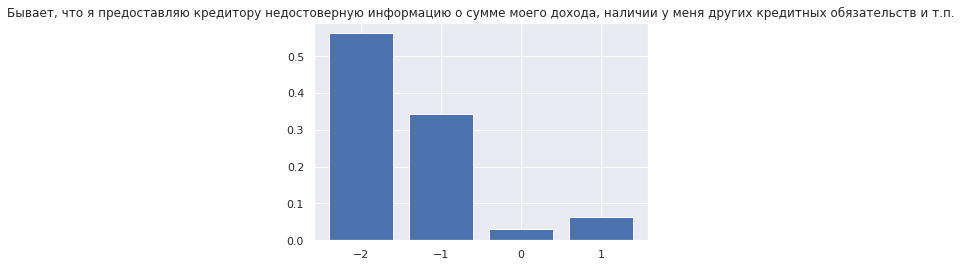

,q,corr
58,"Бывает, что я предоставляю кредитору недостове...",1.000000
59,"Когда я беру кредит, главное для меня – его су...",0.559835
17,"В моей семье, как и во многих семьях, бывают к...",0.462298
35,"У меня есть страхи, что всё откроется (кредиты...",0.440829
55,"Я беру новый кредит, чтобы закрыть старый и не...",0.396546
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.311835
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.315523
62,Я умеют рассчитать допустимый платёж по кредит...,-0.315708
42,Могу легко назвать общую сумму обязательных пл...,-0.544487


In [67]:
correlation_analys(58)

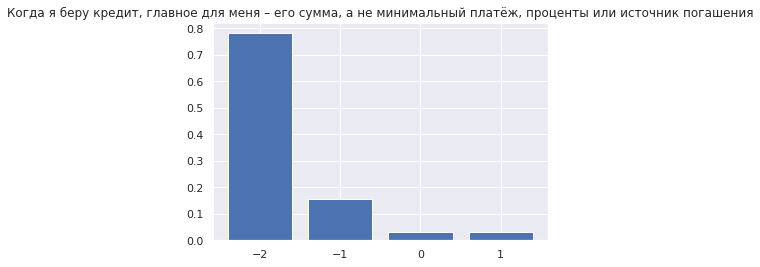

,q,corr
59,"Когда я беру кредит, главное для меня – его су...",1.000000
57,Я всегда стремлюсь получить максимально большо...,0.735056
51,Сумма моих кредитных обязательств (кроме ипоте...,0.584588
58,"Бывает, что я предоставляю кредитору недостове...",0.559835
46,Я решаю финансовые проблемы в последнюю очередь,0.537503
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.408317
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.426624
62,Я умеют рассчитать допустимый платёж по кредит...,-0.449121
42,Могу легко назвать общую сумму обязательных пл...,-0.487083


In [68]:
correlation_analys(59)

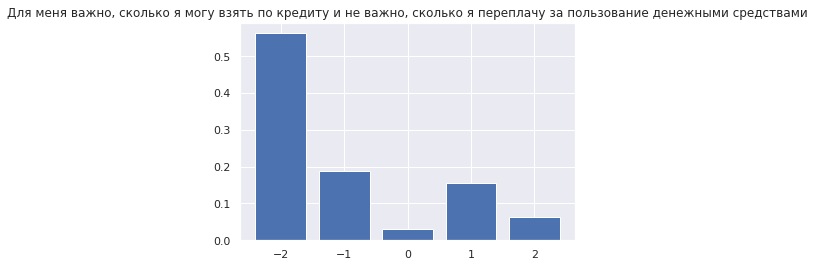

,q,corr
60,"Для меня важно, сколько я могу взять по кредит...",1.000000
40,"Я испытываю сильный эмоциональный подъём, выпл...",0.536708
69,"Есть ряд вещей (товаров, продуктов), приобрест...",0.518917
68,На все мои «хочу» в магазине у меня обычно не ...,0.500630
61,Я ищу «лёгкие» кредиты (которые могу взять без...,0.475055
...,...,...
24,Расходы на отдых в поездках значительные и в к...,-0.081667
62,Я умеют рассчитать допустимый платёж по кредит...,-0.089863
42,Могу легко назвать общую сумму обязательных пл...,-0.135591
52,Я могу легко назвать суммы всех своих минималь...,-0.438823


In [69]:
correlation_analys(60)

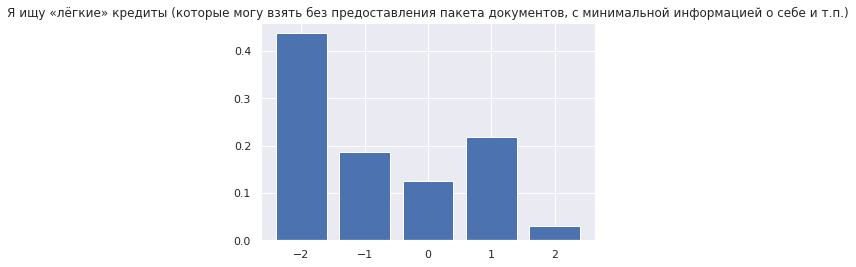

,q,corr
61,Я ищу «лёгкие» кредиты (которые могу взять без...,1.000000
55,"Я беру новый кредит, чтобы закрыть старый и не...",0.533669
57,Я всегда стремлюсь получить максимально большо...,0.495992
60,"Для меня важно, сколько я могу взять по кредит...",0.475055
59,"Когда я беру кредит, главное для меня – его су...",0.418855
...,...,...
65,"Большинство моих вещей, особенно ценных, купле...",-0.287895
12,"Я стремлюсь быть похожа на успешных знакомых, ...",-0.289216
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.309023
42,Могу легко назвать общую сумму обязательных пл...,-0.339351


In [70]:
correlation_analys(61)

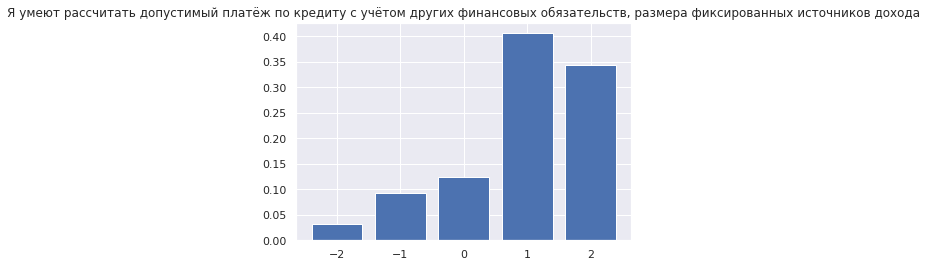

,q,corr
62,Я умеют рассчитать допустимый платёж по кредит...,1.000000
52,Я могу легко назвать суммы всех своих минималь...,0.449398
42,Могу легко назвать общую сумму обязательных пл...,0.444717
26,Отдых без трат скучный и неинтересный. В нём н...,0.277833
6,"Я мечтаю получить от жизни гораздо большее, но...",0.245567
...,...,...
58,"Бывает, что я предоставляю кредитору недостове...",-0.315708
57,Я всегда стремлюсь получить максимально большо...,-0.329691
47,Кредит – самый простой и доступный способ реше...,-0.362413
46,Я решаю финансовые проблемы в последнюю очередь,-0.426685


In [71]:
correlation_analys(62)

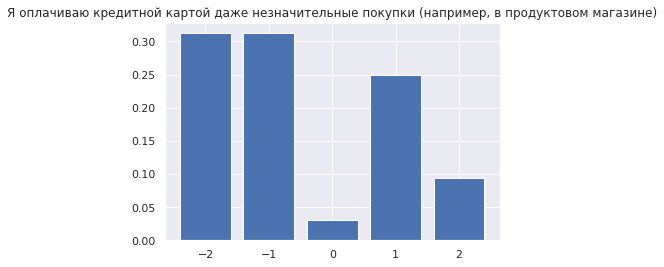

,q,corr
63,Я оплачиваю кредитной картой даже незначительн...,1.000000
54,Мои кредитные карты всегда исчерпаны до дна,0.578371
47,Кредит – самый простой и доступный способ реше...,0.578313
71,"Испытываю тоску, когда не делаю покупок",0.531596
14,"Бывают ситуации, когда я беру в долг у своих р...",0.508001
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.139597
62,Я умеют рассчитать допустимый платёж по кредит...,-0.148425
52,Я могу легко назвать суммы всех своих минималь...,-0.213351
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.295013


In [72]:
correlation_analys(63)

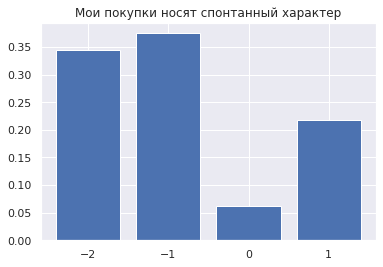

,q,corr
64,Мои покупки носят спонтанный характер,1.000000
43,"Порой я не знаю, куда деваются деньги",0.671582
49,"Если деньги пришли не по плану, я могу потрати...",0.598662
66,"Я покупаю вещи, которые при моём уровне дохода...",0.588482
47,Кредит – самый простой и доступный способ реше...,0.551456
...,...,...
53,Я помню процентную ставку по каждому своему кр...,-0.190823
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.195471
62,Я умеют рассчитать допустимый платёж по кредит...,-0.255036
52,Я могу легко назвать суммы всех своих минималь...,-0.302524


In [73]:
correlation_analys(64)

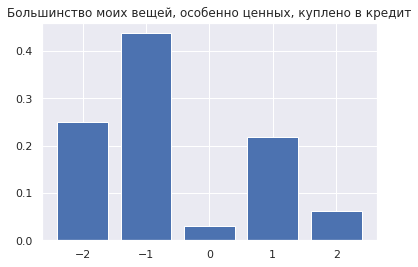

,q,corr
65,"Большинство моих вещей, особенно ценных, купле...",1.000000
44,"На нужную и желанную вещь, я готова потратить ...",0.545530
71,"Испытываю тоску, когда не делаю покупок",0.511752
63,Я оплачиваю кредитной картой даже незначительн...,0.441276
69,"Есть ряд вещей (товаров, продуктов), приобрест...",0.413644
...,...,...
42,Могу легко назвать общую сумму обязательных пл...,-0.149117
3,У меня случаются резкие перепады настроения,-0.164094
26,Отдых без трат скучный и неинтересный. В нём н...,-0.206504
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.230714


In [74]:
correlation_analys(65)

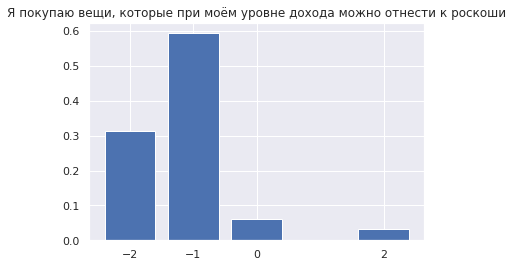

,q,corr
66,"Я покупаю вещи, которые при моём уровне дохода...",1.000000
19,С некоторыми друзьями/родственниками/коллегами...,0.622306
64,Мои покупки носят спонтанный характер,0.588482
43,"Порой я не знаю, куда деваются деньги",0.566736
72,Рядом купленных вещей/ курсов / услуг не польз...,0.547474
...,...,...
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.149218
37,Из-за финансовых проблем я чувствую себя в туп...,-0.153949
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.201178
50,"У меня несколько текущих кредитов, на которые ...",-0.327120


In [75]:
correlation_analys(66)

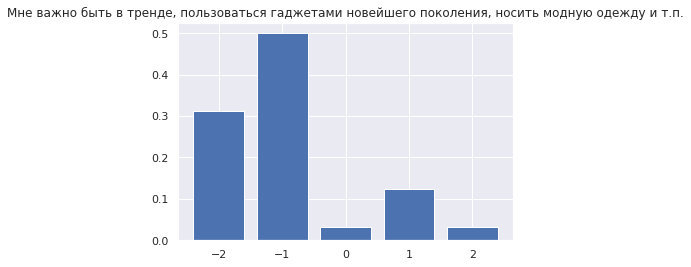

,q,corr
67,"Мне важно быть в тренде, пользоваться гаджетам...",1.000000
71,"Испытываю тоску, когда не делаю покупок",0.698846
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.622052
12,"Я стремлюсь быть похожа на успешных знакомых, ...",0.543596
13,"Даже если у меня финансовые ограничения, стрем...",0.494012
...,...,...
48,"Бывает, что по объективным обстоятельствам я н...",-0.111553
59,"Когда я беру кредит, главное для меня – его су...",-0.113633
51,Сумма моих кредитных обязательств (кроме ипоте...,-0.183718
16,"Есть близкий человек, который оформил на себя ...",-0.187444


In [76]:
correlation_analys(67)

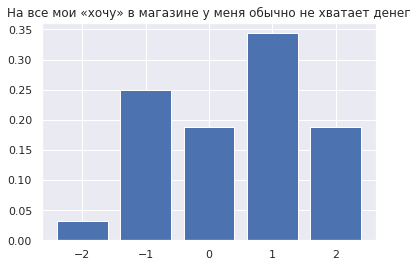

,q,corr
68,На все мои «хочу» в магазине у меня обычно не ...,1.000000
60,"Для меня важно, сколько я могу взять по кредит...",0.500630
32,"Я испытываю сильный стресс, связанный с финанс...",0.486944
45,У меня нет накоплений и подушки безопасности,0.483009
37,Из-за финансовых проблем я чувствую себя в туп...,0.465325
...,...,...
9,Зачастую в моих бедах виноваты другие люди или...,-0.097510
2,"Я устаю от рутины, обычная жизнь тяготит меня",-0.127425
52,Я могу легко назвать суммы всех своих минималь...,-0.214279
53,Я помню процентную ставку по каждому своему кр...,-0.220088


In [77]:
correlation_analys(68)

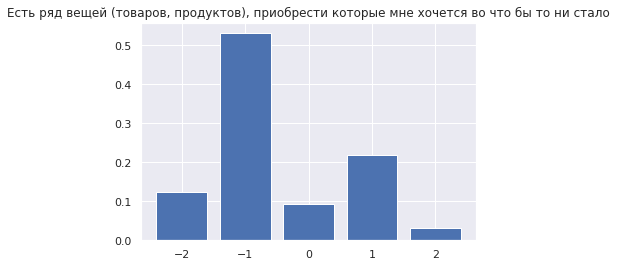

,q,corr
69,"Есть ряд вещей (товаров, продуктов), приобрест...",1.000000
10,"Мне важно общественное мнение. Я переживаю, ка...",0.648083
40,"Я испытываю сильный эмоциональный подъём, выпл...",0.590571
44,"На нужную и желанную вещь, я готова потратить ...",0.584012
60,"Для меня важно, сколько я могу взять по кредит...",0.518917
...,...,...
25,"На отдыхе хочу ярких ощущений, меня привлекает...",-0.110319
1,"Мне скучно, если в жизни не происходят никакие...",-0.162456
2,"Я устаю от рутины, обычная жизнь тяготит меня",-0.188798
52,Я могу легко назвать суммы всех своих минималь...,-0.203628


In [78]:
correlation_analys(69)

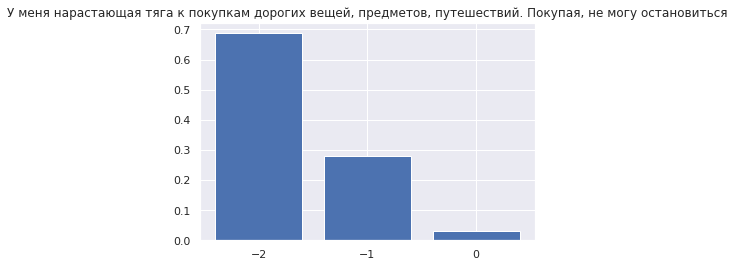

,q,corr
70,У меня нарастающая тяга к покупкам дорогих вещ...,1.000000
71,"Испытываю тоску, когда не делаю покупок",0.760612
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.622052
11,"Других людей я быстро оцениваю, прежде всего, ...",0.546528
73,Слово «скидка» обладает для меня магическим в...,0.474700
...,...,...
38,У меня сеть проблемы со сном,-0.151362
62,Я умеют рассчитать допустимый платёж по кредит...,-0.182148
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.239084
42,Могу легко назвать общую сумму обязательных пл...,-0.281657


In [79]:
correlation_analys(70)

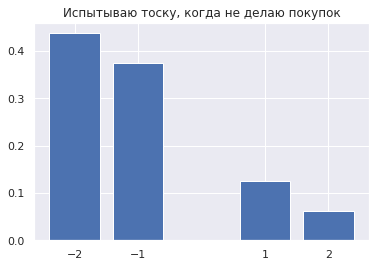

,q,corr
71,"Испытываю тоску, когда не делаю покупок",1.000000
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.760612
67,"Мне важно быть в тренде, пользоваться гаджетам...",0.698846
18,"Мои близкие не знают, что у меня есть ряд кред...",0.565252
64,Мои покупки носят спонтанный характер,0.546231
...,...,...
48,"Бывает, что по объективным обстоятельствам я н...",-0.077152
45,У меня нет накоплений и подушки безопасности,-0.107419
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.171942
52,Я могу легко назвать суммы всех своих минималь...,-0.198390


In [80]:
correlation_analys(71)

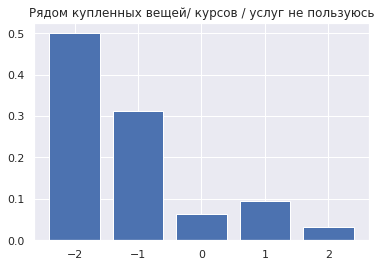

,q,corr
72,Рядом купленных вещей/ курсов / услуг не польз...,1.000000
66,"Я покупаю вещи, которые при моём уровне дохода...",0.547474
70,У меня нарастающая тяга к покупкам дорогих вещ...,0.464494
64,Мои покупки носят спонтанный характер,0.453534
22,На отдыхе не стоит себе ни в чём не отказывать...,0.449727
...,...,...
45,У меня нет накоплений и подушки безопасности,-0.182187
51,Сумма моих кредитных обязательств (кроме ипоте...,-0.212225
30,"Когда я начинаю думать о деньгах, у меня порти...",-0.218830
38,У меня сеть проблемы со сном,-0.223017


In [81]:
correlation_analys(72)

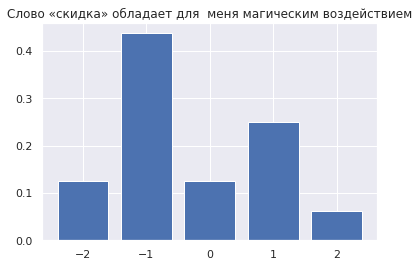

,q,corr
73,Слово «скидка» обладает для меня магическим в...,1.000000
0,Я эмоциональный и впечатлительный человек,0.584798
4,"Мне некомфортно наедине с собой, лучше, если р...",0.560705
10,"Мне важно общественное мнение. Я переживаю, ка...",0.540459
71,"Испытываю тоску, когда не делаю покупок",0.529040
...,...,...
28,Вместо отдыха я предпочитаю компенсации,-0.118236
61,Я ищу «лёгкие» кредиты (которые могу взять без...,-0.121398
17,"В моей семье, как и во многих семьях, бывают к...",-0.217507
41,"Я веду семейный бюджет, ежедневно учитывая все...",-0.221725


In [82]:
correlation_analys(73)